In [2]:
#meta strategy
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np


total_cash = 50000
pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=total_cash)




In [3]:
dates = pd.read_csv("jesse.csv")["date"]

In [36]:
start_date = "01/01/2020"
end_date = "01/01/2023"



secs = ["jesse.csv", "qld_simple.csv" , "old_tech.csv"]

df_equity= pd.DataFrame()
for s in secs:
    sk = pd.read_csv(s)
    col = sk["equity"]
    df_equity[s.split(".csv")[0]] = col






In [5]:
df_equity

,jesse,qld_simple,old_tech
0,10000.00,10000.00,10000.00
1,10075.49,9990.80,10056.93
2,9996.76,10054.28,10066.54
3,10114.98,10052.90,10082.28
4,10123.83,10127.42,10088.83
...,...,...,...
751,19702.09,13038.81,12325.63
752,19359.04,13225.50,12272.13
753,19233.88,13412.19,12070.71
754,19828.57,13074.37,12418.39


In [6]:
df_equity

def make_new_col(sec,time):
  col_name = str(sec)+"_"+str(time)

  df_equity['Return_{c}'.format(c= col_name)] = df_equity[sec].pct_change()
  print("Done")

# Calculate the 60-day moving average return
  df_equity['mva_{c}'.format(c=col_name)] = df_equity['Return_{c}'.format(c= col_name)].rolling(window=time).mean()




In [7]:
df_equity  = df_equity[["jesse"	,"qld_simple" ,"old_tech"]]

In [8]:
for t in [5,20,60]:
    for s in ["jesse"	,"qld_simple" ,"old_tech"]:
        make_new_col(s,t)


Done
Done
Done
Done
Done
Done
Done
Done
Done


In [9]:
subset = df_equity[["mva_qld_simple_5","mva_qld_simple_20","mva_qld_simple_60","mva_jesse_5","mva_jesse_20","mva_jesse_60","mva_old_tech_5", "mva_old_tech_20" ,"mva_old_tech_60"]]

In [10]:
subset

,mva_qld_simple_5,mva_qld_simple_20,mva_qld_simple_60,mva_jesse_5,mva_jesse_20,mva_jesse_60,mva_old_tech_5,mva_old_tech_20,mva_old_tech_60
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
751,0.004215,-0.001544,-0.003433,-0.003043,0.000477,0.002742,-0.005521,-0.003941,0.001919
752,0.004294,-0.000110,-0.003512,-0.002095,0.000714,0.002746,-0.002794,-0.002925,0.002163
753,0.006843,0.000966,-0.002876,-0.003812,-0.000022,0.002179,-0.006375,-0.003635,0.001192
754,0.004547,-0.002524,-0.002783,-0.001007,-0.000274,0.002107,-0.004533,-0.004306,0.001001


In [37]:
mv_60 = subset[["mva_qld_simple_60","mva_jesse_60","mva_old_tech_60"]]

In [25]:
mv_20

,mva_qld_simple_20,mva_jesse_20,mva_old_tech_20
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
751,-0.001544,0.000477,-0.003941
752,-0.000110,0.000714,-0.002925
753,0.000966,-0.000022,-0.003635
754,-0.002524,-0.000274,-0.004306


In [38]:
mv_60 = mv_60 + 0.04

In [40]:
mv_60[mv_60 < 0].count()

mva_qld_simple_60    0
mva_jesse_60         0
mva_old_tech_60      0
dtype: int64

In [28]:
alloc = {}
for i,r in mv_20.iterrows():
    #print(i)
    if i%20==0:
        total = r.sum()
    
        alloc["mva_qld_simple_20"] =  r["mva_qld_simple_20"]/total
        alloc["mva_jesse_20"] = r["mva_jesse_20"]/total
        alloc["mva_old_tech_20"] = r["mva_old_tech_20"]/total

    #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"]
        #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"]
        #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"s
print(total)

print(r["mva_jesse_20"])



        

        

        
        

0.12668025965535332
0.03888865042794269


In [29]:
alloc

{'mva_qld_simple_20': 0.28122929646152073,
 'mva_jesse_20': 0.3751049087130605,
 'mva_old_tech_20': 0.3436657948254188}

In [42]:
shifted_returns = mv_20 - mv_20.min() + 

# Calculate the sum of shifted returns
sum_shifted_returns = shifted_returns.sum()

# Calculate the weights based on the shifted returns
weights = shifted_returns / sum_shifted_returns

In [45]:
mv_20 = mv_20+0.1

In [191]:
mv_20

,mva_qld_simple_20,mva_jesse_20,mva_old_tech_20
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
751,0.008456,0.010477,0.006059
752,0.009890,0.010714,0.007075
753,0.010966,0.009978,0.006365
754,0.007476,0.009726,0.005694


In [42]:
allocs = []
for i,r in mv_60.iterrows():
        alloc = {}
        total = r.sum()
    
        alloc["mva_qld_simple_60"] =  r["mva_qld_simple_60"]/total
        alloc["mva_jesse_60"] = r["mva_jesse_60"]/total
        alloc["mva_old_tech_60"] = r["mva_old_tech_60"]/total

        allocs.append(alloc)

    #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"]
        #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"]
        #returns["mva_qld_simple_20"] = r["mva_qld_simple_20"s
print(total)

#print(r["mva_jesse_20"])



        

        

        
        

0.12021699718005655


In [43]:
fractions = pd.DataFrame(allocs)



fractions["date"] = dates





In [44]:
fractions = fractions.set_index("date")

In [45]:
fractions.to_csv("new_weights_60.csv")

In [77]:
actual_fractions = {"qld_simple" : 0.33 , "jesse" : 0.33 , "old_tech": 0.33}

for i, k in iterrows(fractions):
    buy_vol = trade_x
    buy_vol = buy_vol/actual_fraction[j]*fractions






,mva_qld_simple_20,mva_jesse_20,mva_old_tech_20
date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN
...,...,...,...
2022-12-23,0.338337,0.419214,0.242448
2022-12-27,0.357314,0.387082,0.255605
2022-12-28,0.401549,0.365387,0.233064


In [192]:
fractions

,mva_qld_simple_20,mva_jesse_20,mva_old_tech_20
date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN
...,...,...,...
2022-12-23,0.338337,0.419214,0.242448
2022-12-27,0.357314,0.387082,0.255605
2022-12-28,0.401549,0.365387,0.233064


In [ ]:
fractions.to_csv("weights.csv")

In [104]:
import pickle
trades = ["qld_simple.pkl", "jesse.pkl" , "old_tech.pkl"]
picks = {}
for i, t in enumerate(trades):
 with open(t, "rb") as fp:
     picks[t] = pickle.load(fp)







In [189]:
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from alpaca.trading.enums import AssetClass
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
import asyncio
#API_KEY = "<Your API Key>"
#SECRET_KEY = "<Your Secret Key>"

trading_client = TradingClient("PK2C84XP8XIO9HFLVVPU", "beFPSKILWRgIVrFir1hmzVxcpMxnk9tbjKoLKaOf", paper=True)

account = trading_client.get_account()
for property_name, value in account:
  print(f"\"{property_name}\": {value}")


search_params = GetAssetsRequest(asset_class=AssetClass.US_EQUITY)


"id": 15849869-963c-4051-99c3-540041088229
"account_number": PA34U3EDRQE8
"status": AccountStatus.ACTIVE
"crypto_status": AccountStatus.ACTIVE
"currency": USD
"buying_power": 98944.5694
"regt_buying_power": 98944.5694
"daytrading_buying_power": 0
"non_marginable_buying_power": 49472.28
"cash": 100000
"accrued_fees": 0
"pending_transfer_out": None
"pending_transfer_in": 0
"portfolio_value": 100000
"pattern_day_trader": False
"trading_blocked": False
"transfers_blocked": False
"account_blocked": False
"created_at": 2023-07-11 22:30:42.030093+00:00
"trade_suspended_by_user": False
"multiplier": 2
"shorting_enabled": True
"equity": 100000
"last_equity": 100000
"long_market_value": 0
"short_market_value": 0
"initial_margin": 50527.7153
"maintenance_margin": 0
"last_maintenance_margin": 0
"sma": 100000
"daytrade_count": 0


In [211]:
assets = []
for i, r in fractions.iterrows():
    for k,p in enumerate(picks.keys()):
        if r.name in picks[p].keys():

            weight= fractions.loc[r.name][fractions.columns[k]]
            #print(str(weight) != "nan")
            if str(weight) == "nan":
                weight = 1/(len(fractions.columns))
                if "buys" in picks[p][r.name] :  buys = picks[p][r.name]["buys"]
                if "sells" in picks[p][r.name] :  sells = picks[p][r.name]["sells"]
                #print(buys)
                for b,f in buys.items():
                    #print(b)
                    #print(h,g)
                    if f != 0:
                     
                      order_b = {b : (float(f) / 0.33 * weight)}
                      print("Buy order", order_b)
                      #print(order)
                      assets.append(b)
                      """mkod_buy = MarketOrderRequest( 
                      symbol=b,
                      qty=f,
                      side=OrderSide.BUY,
                      time_in_force=TimeInForce.DAY
                      )
                      trading_client.submit_order(
                      order_data=mkod_buy)"""
               
                for s,q in sells.items():
                    #print(b)
                    #print(h,g)
                    if q != 0:
                      order_s = {s : (float(q) / 0.33 * weight)}
                      #print(order)
                      assets.append(b)
                      print("Sell order", order_s)

                      """ mkod_sell = MarketOrderRequest(
                      symbol=s,
                      qty=q,
                      side=OrderSide.SELL,
                      time_in_force=TimeInForce.DAY
                      )
                      trading_client.submit_order(
                      order_data= mkod_sell)"""

                      
                

            #for j,b in buys




Buy order {'EXPD': 18.18181818181818}
Buy order {'EXPI': 259.5959595959596}
Buy order {'INMD': 74.74747474747474}
Buy order {'LSTR': 12.12121212121212}
Buy order {'MSB': 60.6060606060606}
Buy order {'RVLV': 77.77777777777777}
Buy order {'ULTA': 5.05050505050505}
Buy order {'INMD': 7.07070707070707}
Buy order {'TER': 21.21212121212121}
Sell order {'EXPI': 259.5959595959596}
Sell order {'MSB': 1.01010101010101}
Sell order {'RVLV': 3.03030303030303}
Buy order {'EXPI': 278.78787878787875}
Buy order {'MSB': 1.01010101010101}
Sell order {'INMD': 5.05050505050505}
Sell order {'TER': 21.21212121212121}
Buy order {'EXPI': 7.07070707070707}
Buy order {'RVLV': 1.01010101010101}
Buy order {'STKS': 434.3434343434343}
Sell order {'ULTA': 5.05050505050505}
Buy order {'EXPD': 1.01010101010101}
Buy order {'EXPI': 6.06060606060606}
Buy order {'LSTR': 1.01010101010101}
Buy order {'MSB': 2.02020202020202}
Buy order {'VALE': 114.14141414141415}
Sell order {'INMD': 5.05050505050505}
Sell order {'RVLV': 2.02

In [214]:
ass = ["QQQ", "SHY", "PSQ",'AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA',"INTC", "MSFT" , "COHU","CGNX" , "AMD" , "ADSK" ,"AMAT","TXN","IBM","GE", "HPQ"]

In [216]:
ass = list(set(ass))

In [232]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=30000)

start_date = "01/01/20"
end_date = "01/01/23"
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    
    triggered = False 

    

    #for c in list(ctxs.keys()):
      #  pos = ctxs[c].long_pos()
       # if pos:
       #  cur_port_val += float(ctxs[c].open*float(pos.shares))

   # print(type(cur_port_val))

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    print(dt2)
    #print(dt2)

    for k,p in enumerate(picks.keys()):
        if dt2 in picks[p].keys():

            weight= fractions.loc[dt2][fractions.columns[k]]
            #print(str(weight) != "nan")
            if str(weight) == "nan":
                weight = 1/(len(fractions.columns))
                
            if "buys" in picks[p][dt2] :  
                 buys = picks[p][dt2]["buys"] 
            else:
                 buys = None
                
            if "sells" in picks[p][dt2] :  
                 sells = picks[p][dt2]["sells"] 
            else:
                 sells = None
                #print(buys)
            if buys:
                    print(buys)
                    for b,f in buys.items():
                        #print(b)
                        #print(h,g)
                        if f != 0:
                        
                         order_b = {b : (float(f) / 0.33 * weight)}
                         print("Buy order", order_b)
                         
                        #print(order)
                        #assets.append(b)

                         ctxs[b].buy_shares = abs(order_b[b])
                        """mkod_buy = MarketOrderRequest( 
                        symbol=b,
                        qty=f,
                        side=OrderSide.BUY,
                        time_in_force=TimeInForce.DAY
                        )
                        trading_client.submit_order(
                        order_data=mkod_buy)"""
            if sells:
                  for s,q in sells.items():
                    #print(b)
                    #print(h,g)
                    if q != 0:
                      order_s = {s : (float(q) / 0.33 * weight)}
                      #print(order)
                      #assets.append(b)
                      
                      print("Sell order", order_s)

                      ctxs[s].sell_shares = abs(order_s[s])



    

            
strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date, config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, ass)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (21 of 756) |                       | Elapsed Time: 0:00:00 ETA:  00:00:00
  5% (41 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01


2020-01-02
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPD': 18, 'EXPI': 257, 'INMD': 74, 'LSTR': 12, 'LULU': 0, 'META': 0, 'MSB': 60, 'MSFT': 0, 'RVLV': 77, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'TER': 0, 'VALE': 0, 'ULTA': 5}
Buy order {'EXPD': 18.18181818181818}
Buy order {'EXPI': 259.5959595959596}
Buy order {'INMD': 74.74747474747474}
Buy order {'LSTR': 12.12121212121212}
Buy order {'MSB': 60.6060606060606}
Buy order {'RVLV': 77.77777777777777}
Buy order {'ULTA': 5.05050505050505}
2020-01-03
2020-01-06
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'INMD': 7.0, 'LULU': 0, 'META': 0, 'MSFT': 0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'TER': 21, 'VALE': 0}
Buy order {'INMD': 7.07070707070707}
Buy order {'TER': 21.21212121212121}
Sell order {'EXPI': 259.5959595959596}
Sell order {'MSB': 1.01010101010101}
Sell order {'RVLV': 3.03030303030303}
2020-01-07
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPI': 276, 'LULU': 0, 'META': 0, 'MSB': 1.0, 'MSFT': 0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'VALE': 0}
Buy order {'EXPI': 278.7878787

  8% (61 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (81 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (101 of 756) |##                    | Elapsed Time: 0:00:00 ETA:   0:00:02


2020-03-31
Sell order {'SHY': 180.76480671527}
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'EXPI': 0, 'INMD': 2.0, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSFT': 0, 'RVLV': 1.0, 'SIMO': 0, 'STKS': 3.0, 'TER': 0, 'VALE': 126}
Buy order {'INMD': 0.5708007662108612}
Buy order {'RVLV': 0.2854003831054306}
Buy order {'STKS': 0.8562011493162917}
Buy order {'VALE': 35.96044827128426}
Sell order {'MSB': 0.2854003831054306}
Sell order {'SMLR': 7.705810343846625}
2020-04-01
Sell order {'QQQ': 466.8599219498981}
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'EXPI': 0, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSB': 1.0, 'MSFT': 0, 'SIMO': 0, 'SMLR': 28, 'STKS': 38.0, 'TER': 0}
Buy order {'MSB': -5.594222787229034}
Buy order {'SMLR': -156.63823804241295}
Buy order {'STKS': -212.5804659147033}
Sell order {'DMLP': -22.376891148916137}
Sell order {'RVLV': -16.7826683616871}
Sell order {'VALE': -704.8720711908584}
2020-04-02
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'EXPI': 254, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSB': 1.0, 'MSFT': 0, 'SIMO': 0,

 16% (121 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 18% (141 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:02
 21% (161 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:02


2020-06-19
{'AMAT': 0, 'ASML': 0, 'EXPI': 0, 'INMD': 0, 'LULU': 0, 'META': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 0, 'STKS': 34.0, 'TER': 0, 'VALE': 0}
Buy order {'STKS': 40.34813141699223}
Sell order {'DMLP': 5.933548737792974}
Sell order {'EXPD': 1.1867097475585948}
2020-06-22
{'AMAT': 0, 'ASML': 0, 'EXPI': 0, 'INMD': 0, 'LULU': 0, 'META': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 0, 'STKS': 23.0, 'TER': 0, 'VALE': 0}
Buy order {'STKS': 26.55500679028341}
Sell order {'SIMO': 1.154565512621018}
2020-06-23
{'AMAT': 0, 'ASML': 0, 'EXPI': 0, 'INMD': 0, 'LULU': 0, 'META': 0, 'MSB': 2.0, 'MSFT': 0, 'RVLV': 104, 'SMLR': 0, 'TER': 0, 'VALE': 0}
Buy order {'MSB': 2.249876802089761}
Buy order {'RVLV': 116.99359370866755}
Sell order {'DMLP': 2.249876802089761}
Sell order {'EXPD': 23.623706421942487}
Sell order {'STKS': 24.748644822987366}
Sell order {'HPQ': 0.9378836020479456}
Sell order {'CGNX': 0.9378836020479456}
2020-06-24
{'AMAT': 0, 'ASML': 0, 'EXPD': 21, 'EXPI': 0, 'INMD': 105, 'LULU': 0, 'META': 0, 'M

 23% (181 of 756) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 26% (201 of 756) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 29% (221 of 756) |######                | Elapsed Time: 0:00:00 ETA:   0:00:02


2020-09-04
{'EXPD': 0, 'EXPI': 0, 'INMD': 112, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 1.0, 'STKS': 0, 'TER': 1.0, 'ULTA': 0}
Buy order {'INMD': 139.25665774158844}
Buy order {'SIMO': 1.2433630155498967}
Buy order {'TER': 1.2433630155498967}
Sell order {'DMLP': 1.2433630155498967}
Sell order {'VALE': 207.64162359683274}
2020-09-08
{'AMAT': 2.0, 'EXPD': 0, 'EXPI': 0, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSB': 0, 'MSFT': 8, 'RVLV': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'AMAT': 2.4116857782898387}
Buy order {'MSFT': 9.646743113159355}
Sell order {'DMLP': 4.823371556579677}
Sell order {'INMD': 135.05440358423095}
Sell order {'SIMO': 1.2058428891449193}
Sell order {'SMLR': 1.2058428891449193}
2020-09-09
{'AMAT': 1.0, 'DMLP': 2.0, 'EXPD': 0, 'EXPI': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 5, 'META': 0, 'MSB': 0, 'RVLV': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'AMAT': 1.0698309471717318}
Buy order {'DMLP': 2.1396618943434635}
Buy order {'LULU': 5.3491547

 31% (241 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01
 34% (261 of 756) |#######               | Elapsed Time: 0:00:01 ETA:   0:00:01
 37% (281 of 756) |########              | Elapsed Time: 0:00:01 ETA:   0:00:01


2020-11-16
{'AMAT': 0, 'ASML': 0, 'EXPI': 4.0, 'INMD': 0, 'META': 8, 'MSFT': 10, 'RVLV': 0, 'SMLR': 0, 'STKS': 0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 4.654840933195659}
Buy order {'META': 9.309681866391317}
Buy order {'MSFT': 11.637102332989146}
Sell order {'DMLP': 246.7065694593699}
Sell order {'LSTR': 19.78307396608155}
Sell order {'MSB': 1.1637102332989147}
Sell order {'COHU': 2.1061377281467277}
2020-11-17
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'INMD': 0, 'LSTR': 0, 'RVLV': 0, 'SMLR': 0, 'STKS': 0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Sell order {'EXPI': 1.1254717927854594}
Sell order {'MSB': 1.1254717927854594}
Sell order {'COHU': 1.0940274277011157}
2020-11-18
{'AMAT': 0, 'ASML': 0, 'DMLP': 210, 'EXPI': 1.0, 'INMD': 0, 'LSTR': 0, 'MSB': 2.0, 'RVLV': 0, 'SMLR': 0, 'STKS': 0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'DMLP': 233.0322293486813}
Buy order {'EXPI': 1.109677282612768}
Buy order {'MSB': 2.219354565225536}
Sell order {'EXPD': 27.7419320653192}
Sell order {'SIMO': 1

 39% (301 of 756) |########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 42% (321 of 756) |#########             | Elapsed Time: 0:00:01 ETA:   0:00:01
 45% (341 of 756) |#########             | Elapsed Time: 0:00:01 ETA:   0:00:01
 47% (361 of 756) |##########            | Elapsed Time: 0:00:01 ETA:   0:00:01


2021-03-03
{'AMAT': 0, 'DMLP': 0, 'EXPI': 54, 'INMD': 0, 'LSTR': 0, 'LULU': 1.0, 'RVLV': 0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 62.81707801863803}
Buy order {'LULU': 1.163279222567371}
Sell order {'EXPD': 1.163279222567371}
Sell order {'MSB': 129.12399370497818}
2021-03-04
{'AMAT': 0, 'DMLP': 0, 'EXPI': 9.0, 'INMD': 0, 'LSTR': 0, 'MSB': 0, 'RVLV': 0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'TER': 1.0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 10.367994276120527}
Buy order {'TER': 1.151999364013392}
Sell order {'EXPD': 1.151999364013392}
Sell order {'MSFT': 1.151999364013392}
Sell order {'INTC': 1.109219133009173}
2021-03-05
{'AMAT': 0, 'DMLP': 0, 'EXPI': 3.0, 'INMD': 0, 'LSTR': 0, 'MSB': 107, 'RVLV': 0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 3.4971557917003158}
Buy order {'MSB': 124.73188990397794}
Sell order {'EXPD': 34.97155791700316}
Sell order {'LULU': 1.1657185972334387}
2021-03-08
{'AMAT': 0, 'DMLP': 0, 'EXPD': 0, '

 50% (381 of 756) |###########           | Elapsed Time: 0:00:01 ETA:   0:00:01
 53% (401 of 756) |###########           | Elapsed Time: 0:00:01 ETA:   0:00:01
 55% (421 of 756) |############          | Elapsed Time: 0:00:01 ETA:   0:00:01


2021-06-09
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'EXPI': 94, 'INMD': 0, 'META': 0, 'RVLV': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 11}
Buy order {'EXPI': 122.27340682563023}
Buy order {'ULTA': 14.30859016044609}
Sell order {'MSB': 132.67965421504556}
Sell order {'MSFT': 18.210932931476844}
Sell order {'SIMO': 1.3007809236769174}
Sell order {'SMLR': 1.3007809236769174}
2021-06-10
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'EXPI': 10.0, 'INMD': 0, 'LSTR': 1.0, 'META': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'STKS': 0, 'VALE': 0}
Buy order {'EXPI': 12.630521058092892}
Buy order {'LSTR': 1.2630521058092894}
Sell order {'TER': 1.2630521058092894}
2021-06-11
{'AMAT': 27, 'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'INMD': 0, 'META': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 1.0, 'STKS': 0, 'TER': 1.0, 'VALE': 0}
Buy order {'AMAT': 34.77144677496471}
Buy order {'SMLR': 1.2878313620357298}
Buy order {'TER': 1.2878313620357298}
Sell order {'LULU': 14.166144982393027}
2021-06-14
{'ASML': 0, 'DMLP': 0, 'EXPD'

 58% (441 of 756) |############          | Elapsed Time: 0:00:01 ETA:   0:00:01
 60% (461 of 756) |#############         | Elapsed Time: 0:00:01 ETA:   0:00:01


2021-09-02
{'ASML': 0, 'DMLP': 0, 'EXPI': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSB': 4.0, 'MSFT': 0, 'RVLV': 1.0, 'SIMO': 0, 'STKS': 0, 'ULTA': 0}
Buy order {'MSB': 4.497749795134715}
Buy order {'RVLV': 1.1244374487836788}
Sell order {'EXPD': 1.1244374487836788}
Sell order {'TER': 1.1244374487836788}
2021-09-03
{'ASML': 0, 'DMLP': 0, 'EXPI': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'META': 0, 'MSFT': 0, 'RVLV': 1.0, 'SIMO': 0, 'STKS': 0, 'ULTA': 0}
Buy order {'RVLV': 1.0582146556526721}
Sell order {'AMAT': 1.0582146556526721}
Sell order {'VALE': 1.0582146556526721}
2021-09-07
{'ASML': 0, 'DMLP': 0, 'EXPD': 1.0, 'EXPI': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 10, 'META': 0, 'MSB': 3.0, 'MSFT': 0, 'SIMO': 0, 'STKS': 393, 'VALE': 5.0, 'ULTA': 0}
Buy order {'EXPD': 1.0435980029449297}
Buy order {'LULU': 10.435980029449295}
Buy order {'MSB': 3.1307940088347883}
Buy order {'STKS': 410.1340151573573}
Buy order {'VALE': 5.217990014724648}
Sell order {'AMAT': 31.307940088347888}
Sell order {'RVL

 63% (481 of 756) |#############         | Elapsed Time: 0:00:01 ETA:   0:00:01
 66% (501 of 756) |##############        | Elapsed Time: 0:00:02 ETA:   0:00:01
 68% (521 of 756) |###############       | Elapsed Time: 0:00:02 ETA:   0:00:00


2021-11-12
{'AMAT': 0, 'ASML': 0, 'DMLP': 4.0, 'EXPD': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 1.0, 'SMLR': 1.0, 'STKS': 0, 'TER': 0, 'VALE': 5.0, 'ULTA': 0}
Buy order {'DMLP': 3.404900136039762}
Buy order {'SIMO': 0.8512250340099405}
Buy order {'SMLR': 0.8512250340099405}
Buy order {'VALE': 4.256125170049702}
Sell order {'EXPI': 2.553675102029821}
Sell order {'MSB': 0.8512250340099405}
2021-11-15
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 4.0, 'STKS': 0, 'TER': 0, 'ULTA': 0}
Buy order {'SMLR': 3.152144693963165}
Sell order {'DMLP': 3.152144693963165}
Sell order {'META': 0.7880361734907912}
Sell order {'MSB': 1.5760723469815825}
Sell order {'SIMO': 0.7880361734907912}
2021-11-16
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 2.0, 'STKS': 0, 'TER': 0, 'VALE': 2.0, 'ULTA': 0}
Buy order {'SMLR': 1.4621894213709699}
Buy order {'VALE': 1.4621894213709699}
Sell or

 71% (541 of 756) |###############       | Elapsed Time: 0:00:02 ETA:   0:00:00
 72% (551 of 756) |################      | Elapsed Time: 0:00:02 ETA:   0:00:00
 74% (561 of 756) |################      | Elapsed Time: 0:00:02 ETA:   0:00:00


2022-02-02
{'AMAT': 0, 'DMLP': 0, 'EXPI': 5.0, 'INMD': 2.0, 'LSTR': 0, 'META': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 6.621390906330857}
Buy order {'INMD': 2.648556362532343}
Sell order {'LULU': 1.3242781812661715}
Sell order {'SMLR': 1.3242781812661715}
2022-02-03
{'AMAT': 0, 'DMLP': 0, 'LSTR': 0, 'META': 13, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'META': 18.640757825078193}
Sell order {'EXPD': 1.433904448082938}
Sell order {'EXPI': 5.735617792331752}
Sell order {'LULU': 12.90514003274644}
2022-02-04
{'AMAT': 0, 'DMLP': 0, 'EXPD': 1.0, 'LSTR': 21, 'LULU': 0, 'META': 1.0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPD': 1.4659917213521376}
Buy order {'LSTR': 30.78582614839489}
Buy order {'META': 1.4659917213521376}
Sell order {'EXPI': 4.397975164056413}
Sell order {'SMLR': 63.037644018141904}
2022-02-07
{'AMAT': 0, 'DMLP': 0, 'EXPI': 1

 76% (581 of 756) |################      | Elapsed Time: 0:00:02 ETA:   0:00:00
 78% (591 of 756) |#################     | Elapsed Time: 0:00:02 ETA:   0:00:00
 80% (611 of 756) |#################     | Elapsed Time: 0:00:02 ETA:   0:00:00


2022-03-24
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPI': 5.0, 'LSTR': 0, 'LULU': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 4.581967128709057}
Sell order {'INMD': 1.832786851483623}
Sell order {'SMLR': 0.9163934257418115}
Sell order {'STKS': 2.749180277225434}
Sell order {'IBM': 17.30851237489596}
2022-03-25
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'EXPI': 7.0, 'INMD': 3.0, 'LSTR': 0, 'LULU': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 1.0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPI': 5.298096685235576}
Buy order {'INMD': 2.270612865100961}
Buy order {'SMLR': 0.7568709550336538}
Sell order {'SIMO': 0.7568709550336538}
Sell order {'STKS': 5.298096685235576}
2022-03-28
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'LSTR': 0, 'LULU': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 0, 'STKS': 6.0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'STKS': 4.894244253276309}
Sell order {'EXPI': 0.8157073755460515}
2022-03-29
{'AMAT': 0, 'ASML': 0, 'DMLP': 0, 'LSTR': 0, 'LULU': 0, 'MSB': 0,

 83% (631 of 756) |##################    | Elapsed Time: 0:00:02 ETA:   0:00:00
 86% (651 of 756) |##################    | Elapsed Time: 0:00:02 ETA:   0:00:00
 88% (671 of 756) |###################   | Elapsed Time: 0:00:02 ETA:   0:00:00


2022-06-24
Sell order {'PSQ': 267.8666125811414}
{'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'EXPI': 6.0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSFT': 0, 'RVLV': 81, 'SIMO': 0, 'SMLR': 1.0, 'STKS': 4.0, 'TER': 0, 'VALE': 3.0, 'ULTA': 0}
Buy order {'EXPI': 9.833070298071755}
Buy order {'RVLV': 132.7464490239687}
Buy order {'SMLR': 1.638845049678626}
Buy order {'STKS': 6.555380198714504}
Buy order {'VALE': 4.9165351490358775}
Sell order {'MSB': 170.4398851665771}
2022-06-27
Sell order {'SHY': 58.504121973258655}
2022-06-28
{'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'INMD': 103, 'LSTR': 0, 'LULU': 0, 'MSB': 0, 'MSFT': 0, 'RVLV': 7.0, 'SIMO': 0, 'SMLR': 3.0, 'TER': 0, 'ULTA': 0}
Buy order {'INMD': 183.29837508084813}
Buy order {'RVLV': 12.457171121999387}
Buy order {'SMLR': 5.338787623714023}
Sell order {'EXPI': 5.338787623714023}
Sell order {'STKS': 1.7795958745713412}
Sell order {'VALE': 307.870086300842}
2022-06-29
Sell order {'QQQ': 14.340864321097753}
{'ASML': 4, 'DMLP': 0, 'EXPD': 0, 'LSTR': 0, 'LULU': 0, 

 91% (691 of 756) |####################  | Elapsed Time: 0:00:02 ETA:   0:00:00
 94% (711 of 756) |####################  | Elapsed Time: 0:00:03 ETA:   0:00:00
 96% (731 of 756) |##################### | Elapsed Time: 0:00:03 ETA:   0:00:00


2022-09-15
{'AMAT': 28, 'ASML': 0, 'DMLP': 0, 'EXPD': 0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSB': 1.0, 'RVLV': 0, 'SMLR': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'AMAT': 18.136269930768382}
Buy order {'MSB': 0.6477239260988709}
Sell order {'EXPI': 134.72657662856514}
Sell order {'STKS': 3.886343556593225}
Sell order {'TER': 0.6477239260988709}
Sell order {'HPQ': 0.4827511393301743}
2022-09-16
{'ASML': 0, 'DMLP': 0, 'EXPD': 27, 'EXPI': 207, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'MSB': 3.0, 'RVLV': 0, 'SMLR': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'EXPD': 15.55623536894408}
Buy order {'EXPI': 119.26447116190462}
Buy order {'MSB': 1.728470596549342}
Sell order {'AMAT': 16.13239223446053}
Sell order {'SIMO': 0.5761568655164474}
Sell order {'STKS': 207.99262845143755}
2022-09-19
2022-09-20
2022-09-21
2022-09-22
{'AMAT': 28, 'ASML': 0, 'DMLP': 0, 'EXPI': 12.0, 'INMD': 0, 'LSTR': 0, 'LULU': 0, 'RVLV': 0, 'SMLR': 0, 'STKS': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'AMAT': 16.32698057015455}
Buy order {'EXPI': 6

 99% (751 of 756) |##################### | Elapsed Time: 0:00:03 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


2022-12-09
{'AMAT': 0, 'ASML': 0, 'DMLP': 1.0, 'EXPD': 0, 'EXPI': 1.0, 'INMD': 0, 'LSTR': 0, 'LULU': 8, 'MSB': 1.0, 'RVLV': 0, 'SIMO': 0, 'SMLR': 1.0, 'STKS': 3.0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'DMLP': 1.1755425462932219}
Buy order {'EXPI': 1.1755425462932219}
Buy order {'LULU': 9.404340370345775}
Buy order {'MSB': 1.1755425462932219}
Buy order {'SMLR': 1.1755425462932219}
Buy order {'STKS': 3.526627638879665}
Sell order {'MSFT': 12.930968009225438}
2022-12-12
{'AMAT': 0, 'ASML': 0, 'EXPD': 0, 'INMD': 0, 'LSTR': 0, 'MSFT': 0, 'RVLV': 0, 'SIMO': 0, 'STKS': 14.0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'STKS': 15.650687839697886}
Sell order {'DMLP': 1.1179062742641348}
Sell order {'EXPI': 2.2358125485282696}
Sell order {'SMLR': 2.2358125485282696}
2022-12-13
Sell order {'SHY': 152.83668465344368}
{'AMAT': 0, 'ASML': 0, 'DMLP': 3.0, 'EXPD': 0, 'EXPI': 7.0, 'INMD': 0, 'LSTR': 0, 'MSFT': 0, 'RVLV': 115, 'SIMO': 0, 'STKS': 5.0, 'TER': 0, 'VALE': 0, 'ULTA': 0}
Buy order {'DMLP

In [233]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2020-01-02,30000.00,30000.00,0.00,30000.00,0.00,0.00,0.0
2020-01-03,20388.67,30075.52,0.00,30075.52,75.52,0.00,0.0
2020-01-06,20388.67,29996.58,0.00,29996.58,-3.42,0.00,0.0
2020-01-07,20293.78,30114.58,0.00,30114.58,114.58,0.00,0.0
2020-01-08,20369.65,30123.35,0.00,30123.35,123.35,0.00,0.0
...,...,...,...,...,...,...,...
2022-12-23,17281.73,17281.73,801869.47,-15750.80,-12718.27,-33032.53,0.0
2022-12-27,17429.00,17429.00,796101.57,-10796.89,-12571.00,-28225.89,0.0
2022-12-28,16173.63,17398.62,793778.46,-7074.62,-12601.38,-24473.24,0.0


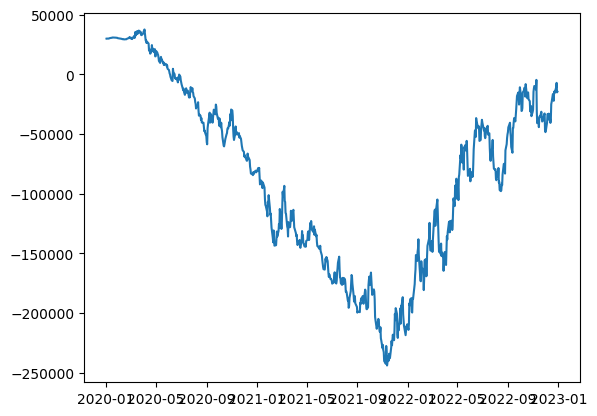

In [234]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [123]:
for n in new_dict.keys():
    if len(new_dict[n]) > 1:
        print(new_dict[n])

[{'buy': {'SHY': 121, 'PSQ': 0}, 'sells': {'QQQ': 46.0}}, {'buys': {'AMAT': 0, 'DMLP': 1.0, 'EXPI': 0, 'INMD': 0, 'LULU': 0, 'META': 7, 'MSFT': 0, 'RVLV': 2.0, 'SIMO': 0, 'SMLR': 0, 'STKS': 0, 'TER': 0, 'ULTA': 0}, 'sells': {'ASML': 5.0, 'EXPD': 0.0, 'LSTR': 0.0, 'MSB': 0.0, 'VALE': 2.0}}, {'buy': {'MSFT': 10.0, 'AMD': 2.0}, 'sells': {'IBM': 0.0, 'HPQ': 0.0, 'INTC': 1.0, 'GE': 4.0, 'TXN': 0.0, 'ADSK': 1.0}}]
[{'buy': {'QQQ': 46, 'PSQ': 0}, 'sells': {'SHY': 121.0}}, {'buy': {'MSFT': 7.0, 'HPQ': 1.0}, 'sells': {'AMD': 0.0, 'IBM': 0.0, 'INTC': 0.0, 'GE': 0.0, 'TXN': 0.0, 'ADSK': 0.0}}]
[{'buy': {'SHY': 110, 'PSQ': 0}, 'sells': {'QQQ': 45.0}}, {'buys': {'AMAT': 0, 'ASML': 0, 'EXPI': 278, 'INMD': 0, 'LULU': 0, 'META': 0, 'MSB': 2.0, 'MSFT': 0, 'RVLV': 0, 'SMLR': 0, 'STKS': 0, 'ULTA': 0}, 'sells': {'DMLP': 1.0, 'EXPD': 19.0, 'LSTR': 0.0, 'SIMO': 0.0, 'TER': 1.0, 'VALE': 1.0}}, {'buy': {'COHU': 9.0}, 'sells': {'AMD': 0.0, 'IBM': 0.0, 'HPQ': 26.0, 'INTC': 0.0, 'GE': 0.0, 'MSFT': 0.0, 'TXN': 0.

In [235]:
ass

['GE',
 'ADSK',
 'EXPD',
 'LSTR',
 'QQQ',
 'SHY',
 'EXPI',
 'DMLP',
 'RVLV',
 'TER',
 'LULU',
 'IBM',
 'ULTA',
 'MSFT',
 'INTC',
 'ASML',
 'INMD',
 'VALE',
 'SMLR',
 'META',
 'MSB',
 'SIMO',
 'AMD',
 'STKS',
 'AMAT',
 'COHU',
 'CGNX',
 'TXN',
 'PSQ',
 'HPQ']

In [183]:
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from alpaca.trading.enums import AssetClass
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

#API_KEY = "<Your API Key>"
#SECRET_KEY = "<Your Secret Key>"

trading_client = TradingClient("PK2C84XP8XIO9HFLVVPU", "beFPSKILWRgIVrFir1hmzVxcpMxnk9tbjKoLKaOf", paper=True)

In [184]:
account = trading_client.get_account()
for property_name, value in account:
  print(f"\"{property_name}\": {value}")

"id": 15849869-963c-4051-99c3-540041088229
"account_number": PA34U3EDRQE8
"status": AccountStatus.ACTIVE
"crypto_status": AccountStatus.ACTIVE
"currency": USD
"buying_power": 158821.3112
"regt_buying_power": 158821.3112
"daytrading_buying_power": 0
"non_marginable_buying_power": 79410.65
"cash": 100000
"accrued_fees": 0
"pending_transfer_out": None
"pending_transfer_in": 0
"portfolio_value": 100000
"pattern_day_trader": False
"trading_blocked": False
"transfers_blocked": False
"account_blocked": False
"created_at": 2023-07-11 22:30:42.030093+00:00
"trade_suspended_by_user": False
"multiplier": 2
"shorting_enabled": True
"equity": 100000
"last_equity": 100000
"long_market_value": 0
"short_market_value": 0
"initial_margin": 20589.3444
"maintenance_margin": 0
"last_maintenance_margin": 0
"sma": 100000
"daytrade_count": 0


In [185]:
search_params = GetAssetsRequest(asset_class=AssetClass.US_EQUITY)


In [92]:
market_order_data = MarketOrderRequest(
                    symbol="SPY",
                    qty=0.023,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.DAY
                    )

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'exchange': None,
    'status': None}